# Limpeza do dataset: "Suicide Rates & Socioeconomic Factors (1990 - 22)"
### Autor: José Ivo, Marina e Carol

#### Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Baixando e escolhendo as Bases de Dados



Encontramos duas bases de dados nessa situação: "suicide_rates_1990-2022.csv" e "age_std_suicide_rates_1990-2022.csv". Notamos após uma rápida análise que o primeiro DataFrame tem um número bem maior de registros, além de ser mais completo: ele possui informações a respeito das idades e da geração de cada pessoa. Por isso, analisaremos apenas o primeiro DataFrame.

In [3]:
df = pd.read_csv("suicide_rates_1990-2022.csv")
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


### Analisando ausência de variáveis

Para termos uma noção melhor dos dados faltantes, veremos os valores ausentes por coluna.

In [4]:
print(df.isnull().sum())

RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4289
DeathRatePer100K                10664
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64


Geramos o gráfico a seguir para visualizar a representação em porcentagem dos valores faltantes

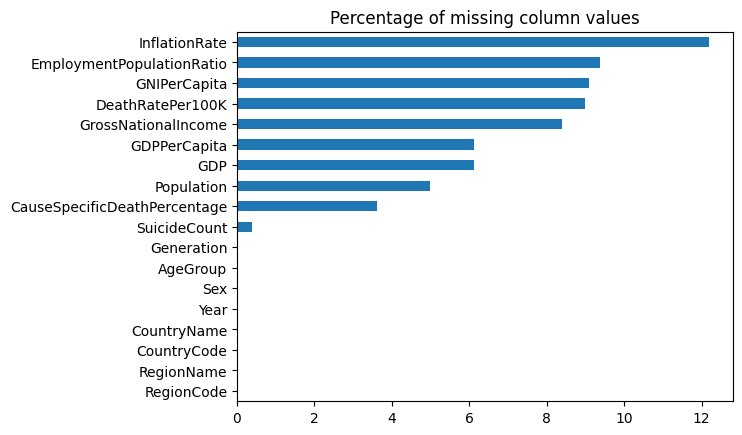

In [5]:


# Calculate the percentage of missing values in each column
missing_percent_threshold = 20
missing_percentages = df.isna().sum() * 100 / len(df)
missing_percentages = round(missing_percentages, 2)

# Sort missing percentages in descending order
missing_percentages_sorted = missing_percentages.sort_values(ascending=True)

# Plot a bar chart showing the percentage of missing values for each column
missing_percentages_sorted.plot(kind='barh', title="Percentage of missing column values")

# Drop columns with missing value percentage exceeding the threshold
for column, missing_percentage in missing_percentages_sorted.items():
    if missing_percentage > missing_percent_threshold:
        df.drop(columns=column, inplace=True)



### Mapa de correlação das variáveis

Analisamos o mapa de calor das correlações entre variáveis para avaliar a proporcionalidade entre os valores, nos ajudando a encontrar colunas com informações redundantes

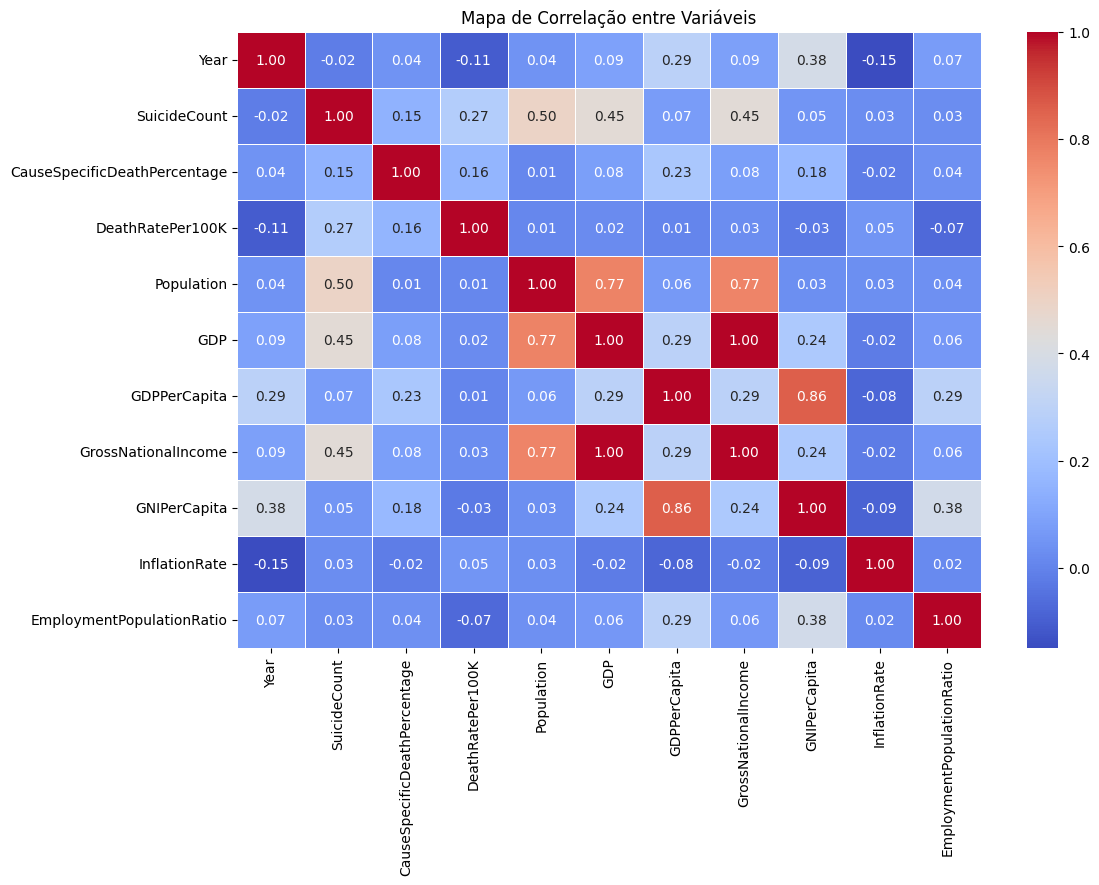

In [6]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis")
plt.show()


Algo que foge da correlação mas ficou evidente, é que as colunas RegionCode e RegionName, da mesma forma que CountryCode e CountryName passam a mesma informação, logo são redundantes, removeremos as colunas Code.

In [7]:
try:
    df = df.drop(columns=["CountryCode", "RegionCode"])
except KeyError:
    print("Columns 'CountryCode' or 'RegionCode' not found in the DataFrame. Skipping drop operation.")
    pass

### Removendo valores

Esses são os valores ausentes por coluna:

In [8]:
print(df.isnull().sum())


RegionName                          0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4289
DeathRatePer100K                10664
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64


Removendo as duplicatas

In [9]:
df = df.drop_duplicates()


O GNI traz informações muito semelhantes ao GDP (PIB), então sua remoção não trará grandes impactos ao nosso dataset. O mesmo vale para GNIPerCapita.

Quanto a coluna "Generation", encontramos irregularidades nos cálculos, por exemplo: grupos de criança da década de 90 estavam sendo dadas como Geração Z, pois apenas a idade estava sendo considerada. Portanto, removemos essa coluna.

Por fim, removemos todas as linhas que tivessem o SuicideCount nulo, pois consideramos a presença desse valor essencial para nossa análise.

In [10]:
df = df.drop('GrossNationalIncome', axis=1)
df = df.drop('GNIPerCapita', axis=1)
df = df.drop('Generation', axis=1)
df = df.dropna(subset = 'SuicideCount')

Para termos uma melhor noção da interseção entre as variáveis faltantes, fizemos o seguinte gráfico:

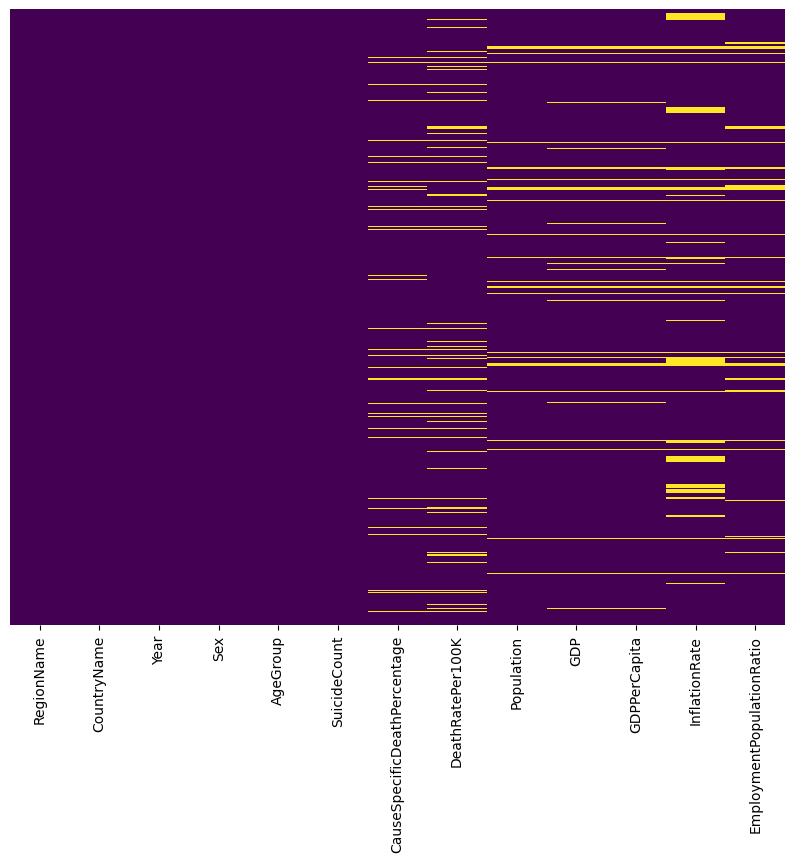

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

Podemos observar que as variáveis Population, GDP, GDPPerCapita, InflationRate e EmploymentPopulationRatio geralmente estão faltantes nas mesmas linhas. Portanto, decidimos dropar essas linhas, pois esses valores são essenciais para realizar a análise socioeconômica da análise.(GDPPerCapita não será dropado já que é possível preenchê-lo na existência de populatione e GDP)

In [12]:
df = df.dropna(subset=['Population', 'GDP', 'GDPPerCapita', 'InflationRate', 'EmploymentPopulationRatio'], how='all')

Por fim, temos os seguintes valores faltantes por coluna:

In [13]:
df.isnull().sum()

RegionName                         0
CountryName                        0
Year                               0
Sex                                0
AgeGroup                           0
SuicideCount                       0
CauseSpecificDeathPercentage    3364
DeathRatePer100K                7628
Population                         0
GDP                             1186
GDPPerCapita                    1186
InflationRate                   7261
EmploymentPopulationRatio       2146
dtype: int64

### Visualizando a padronização das colunas

#### Dados econômicos

Um ponto importante é ver se os dados que estão em uma mesma coluna estão padronizados. Isso se torna mais importante nas colunas que tratam de valores financeiros, pois a moeda utilizada deve ser a mesma para todos os valores.

Vimos que a fonte dos dados econômicos da base é o World Bank, instituição que usa dólares por padrão em seus dados, portanto esse ajuste não foi necessário.

#### Gênero

Outra possibilidade de inconsistência seria o uso de mais de um rótulo para o mesmo sexo, exemplo: Man e Male para o sexo masculino.


#### AgeGroup

Existe um problema no formato dos dados de AgeGroup, para a etapa de data mining o ideal são dados numéricos, portanto vamos criar a coluna AgeMean que representará justamente esses dados.


In [14]:
df["Sex"].value_counts()

Sex
Male       46379
Female     43829
Unknown      987
Name: count, dtype: int64

Note que o valor Unknown para sexo é 987, apenas 1% dos dados, decidimos então que não será utilizado

In [15]:
df = df[df["Sex"]!='Unknown']

Vamos criar AgeMean

In [16]:
# Extrair os valores numéricos de AgeGroup e calcular a média
df['AgeMean'] = df['AgeGroup'].str.extract(r'(\d+)-(\d+)').astype(float).mean(axis=1)

In [17]:
df.head()

,RegionName,CountryName,Year,Sex,AgeGroup,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,InflationRate,EmploymentPopulationRatio,AgeMean
0,Europe,Albania,1992,Male,0-14 years,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,226.005421,45.315,7.0
4,Europe,Albania,1992,Male,15-24 years,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,226.005421,45.315,19.5
5,Europe,Albania,1992,Male,15-24 years,4.0,1.904762,3.276003,3247039.0,652174990.8,200.85222,226.005421,45.315,19.5
6,Europe,Albania,1992,Male,25-34 years,3.0,1.357466,2.487562,3247039.0,652174990.8,200.85222,226.005421,45.315,29.5
7,Europe,Albania,1992,Male,25-34 years,4.0,2.094241,3.202562,3247039.0,652174990.8,200.85222,226.005421,45.315,29.5


## Salvando os dados

In [18]:
# Vamos salvar os dados no csv suicide_rates_limpo.csv
df.to_csv("suicide_rates_limpo.csv", index=False)

A partir disso, podemos ver que esse tipo de irregularidade não ocorre nessa base de dados.

# Ajuda baiano

O que fazer com dados do tipo "Unknown" em Sex e Age group

O que fazer com o resto dos dados faltantes
Exemplo: Argentina e Turcomenistão não possuem nenhum valor na coluna InflationRate, de modo que não podemos fazer a média para inputar esses dados